In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import statsmodels.api as sm
import os
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from statsmodels.nonparametric.kde import KDEUnivariate

In [3]:
df = pd.read_csv("titanic data.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [5]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
df.drop(["Name", "Ticket", "Cabin"], axis=1, inplace=True)
df.dropna(inplace=True)
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [7]:
df_dumm = pd.get_dummies(df)
df_dumm.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,2,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,4,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,5,0,3,35.0,0,0,8.0500,0,1,0,0,1


In [8]:
X = df_dumm[["Pclass", "Sex_female", "Sex_male","Age", "SibSp", "Parch", "Embarked_C", "Embarked_Q", "Embarked_S"]]
y = df_dumm.Survived

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [10]:
logist_regress = LogisticRegression().fit(X_train, y_train)
logist_regress

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [11]:
logist_regress.score(X_test, y_test)

0.8426966292134831

In [17]:
result = sm.Logit(y_train, X_train).fit()

Optimization terminated successfully.
         Current function value: 0.452399
         Iterations 7


In [13]:
kde = KDEUnivariate(result.predict())
kde.fit()

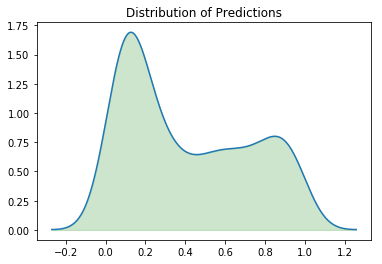

In [18]:
plt.plot(kde.support,kde.density)
plt.fill_between(kde.support, kde.density, alpha=0.2, color="g")
plt.title("Distribution of Predictions");

#### The plot above displays a density highest near zero shows that a lot of passengers did not survive.

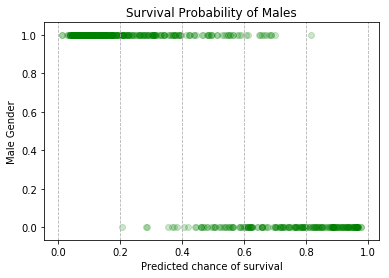

In [15]:
plt.scatter(result.predict(), X_train["Sex_male"], alpha=0.2, c="g")
plt.grid(b=True, axis='x', which='major', ls="--")
plt.xlabel("Predicted chance of survival")
plt.ylabel("Male Gender")
plt.title("Survival Probability of Males");

#### The plot above shows that males have a lower probability of survival.